In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.impute import SimpleImputer

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train['source'] = 'train'
test['source'] = 'test'

df = pd.concat([train, test])

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [2]:
cols = [col.lower() for col in df.columns]
df.columns = cols

# <font color = 'gold'> Data Exploration - Part 1</font>


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            14204 non-null  object 
 1   item_weight                11765 non-null  float64
 2   item_fat_content           14204 non-null  object 
 3   item_visibility            14204 non-null  float64
 4   item_type                  14204 non-null  object 
 5   item_mrp                   14204 non-null  float64
 6   outlet_identifier          14204 non-null  object 
 7   outlet_establishment_year  14204 non-null  int64  
 8   outlet_size                10188 non-null  object 
 9   outlet_location_type       14204 non-null  object 
 10  outlet_type                14204 non-null  object 
 11  item_outlet_sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [4]:
df.isnull().sum() / df.shape[0] * 100

item_identifier               0.000000
item_weight                  17.171219
item_fat_content              0.000000
item_visibility               0.000000
item_type                     0.000000
item_mrp                      0.000000
outlet_identifier             0.000000
outlet_establishment_year     0.000000
outlet_size                  28.273726
outlet_location_type          0.000000
outlet_type                   0.000000
item_outlet_sales            39.995776
source                        0.000000
dtype: float64

In this situation we have 2 options: remove the rolls that have missing data or we can threat them. </br>
We're gone threat them with:

Item_weight - apply the mean or median Item_weight of the dataset. We are going to check it later</br>
Outlet_size - apply the mode of the value of this variable. It's a qualitative variable. <br>
Item_outlet_sales - in this case we don't need to do anything. We are already going to predict the value 

In [5]:
df.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## <font color = 'teal'> item_identifier </font>

In [6]:
# item_identifier

df.item_identifier.nunique()

1559

## <font color = 'teal'> item_fat_content </font>

In [7]:
df.item_fat_content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: item_fat_content, dtype: int64

## <font color = 'teal'> item_type </font>

In [8]:
df.item_type.value_counts(normalize = True) * 100

Fruits and Vegetables    14.172064
Snack Foods              14.003098
Household                10.898338
Frozen Foods             10.039426
Dairy                     7.997747
Baking Goods              7.645734
Canned                    7.631653
Health and Hygiene        6.040552
Meat                      5.181639
Soft Drinks               5.111236
Breads                    2.928752
Hard Drinks               2.548578
Others                    1.971276
Starchy Foods             1.893833
Breakfast                 1.309490
Seafood                   0.626584
Name: item_type, dtype: float64

In [9]:
df.groupby('item_type').item_outlet_sales.mean()

item_type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: item_outlet_sales, dtype: float64

In [10]:
df.groupby('item_type').item_outlet_sales.sum()

item_type
Baking Goods             1.265525e+06
Breads                   5.532372e+05
Breakfast                2.322990e+05
Canned                   1.444151e+06
Dairy                    1.522594e+06
Frozen Foods             1.825735e+06
Fruits and Vegetables    2.820060e+06
Hard Drinks              4.577934e+05
Health and Hygiene       1.045200e+06
Household                2.055494e+06
Meat                     9.175656e+05
Others                   3.255176e+05
Seafood                  1.488682e+05
Snack Foods              2.732786e+06
Soft Drinks              8.928977e+05
Starchy Foods            3.514013e+05
Name: item_outlet_sales, dtype: float64

## <font color = 'teal'> outlet_identifier </font>

In [11]:
df.outlet_identifier.nunique()

10

## <font color = 'teal'> outlet_size </font>

In [12]:
df.outlet_size.value_counts(normalize=True) * 100

Medium    45.691009
Small     39.065567
High      15.243424
Name: outlet_size, dtype: float64

In [13]:
df.groupby('outlet_size').item_outlet_sales.mean()

outlet_size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: item_outlet_sales, dtype: float64

In [14]:
df.groupby('outlet_size').item_outlet_sales.median()

outlet_size
High      2050.6640
Medium    2251.0698
Small     1544.6560
Name: item_outlet_sales, dtype: float64

In [15]:
df.groupby('outlet_size').item_outlet_sales.sum()

outlet_size
High      2.142664e+06
Medium    7.489719e+06
Small     4.566212e+06
Name: item_outlet_sales, dtype: float64

## <font color = 'teal'> outlet_location_type </font>

In [16]:
df.outlet_location_type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: outlet_location_type, dtype: int64

In [17]:
df.groupby('outlet_location_type').item_outlet_sales.mean()

outlet_location_type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: item_outlet_sales, dtype: float64

This variable possibly will not be a good idea to input into the model. 
All the Tiers have a similar sale's mean. 

## <font color = 'teal'> outlet_type </font>

In [18]:
df.outlet_type.value_counts(normalize = True)

Supermarket Type1    0.654323
Grocery Store        0.127077
Supermarket Type3    0.109758
Supermarket Type2    0.108843
Name: outlet_type, dtype: float64

In [19]:
df.groupby('outlet_type').item_outlet_sales.mean()

outlet_type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: item_outlet_sales, dtype: float64

In [20]:
df.groupby('outlet_type').item_outlet_sales.median()

outlet_type
Grocery Store         256.9988
Supermarket Type1    1990.7420
Supermarket Type2    1655.1788
Supermarket Type3    3364.9532
Name: item_outlet_sales, dtype: float64

I'll put Supermarket type1 and Supermarket type2 together. They have a similar sale's mean and putting this two separeated could impact the modeling.

## <font color = 'teal'> item_mrp <font>

In [21]:
df.item_mrp.describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: item_mrp, dtype: float64

In [22]:
def box(df, column):
    print('Variável: ', column)
    
    plt.figure(figsize = (12, 7))
    
    sns.boxplot(data = df, x = column) 
    
    title = 'Dist.: ' + column
    plt.title(title, fontsize = 15)  

    plt.show()

Variável:  item_weight


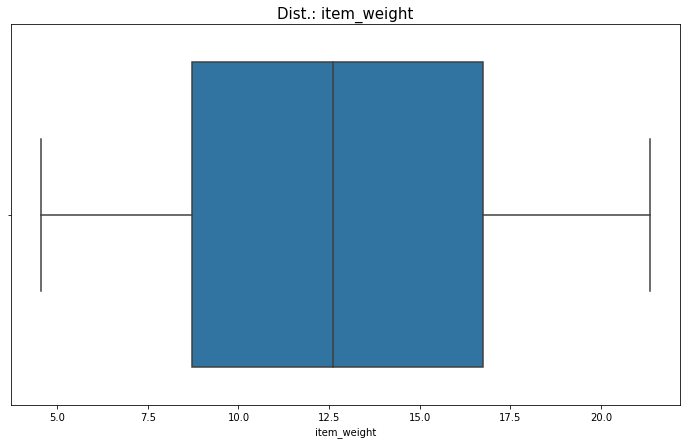

Variável:  item_visibility


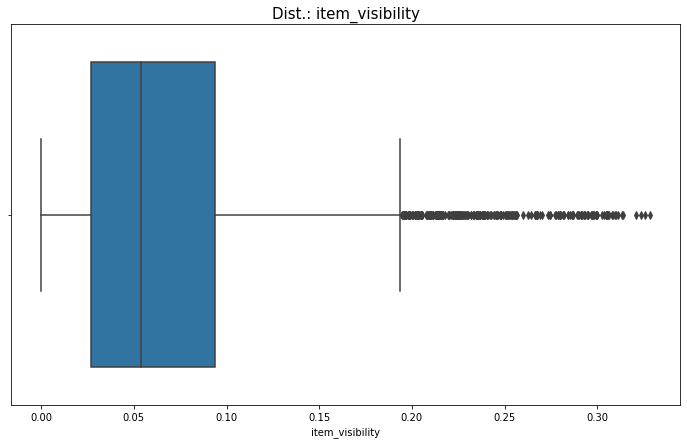

Variável:  item_mrp


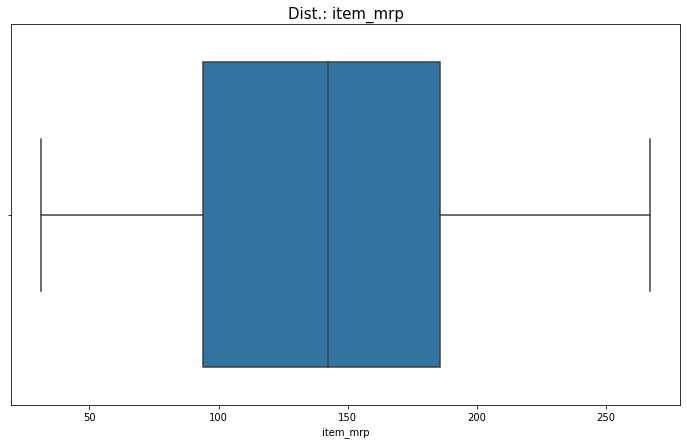

Variável:  outlet_establishment_year


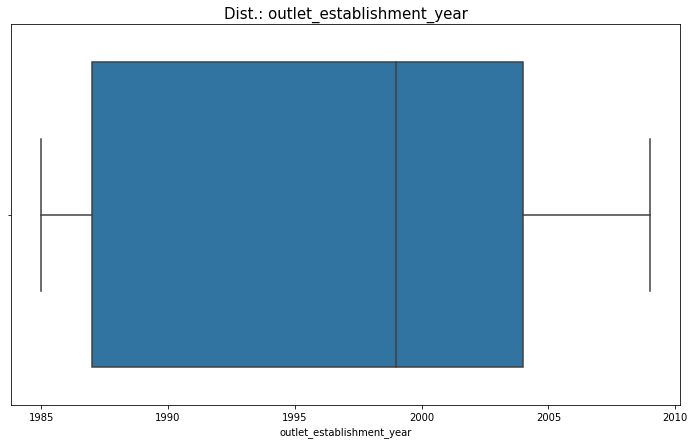

Variável:  item_outlet_sales


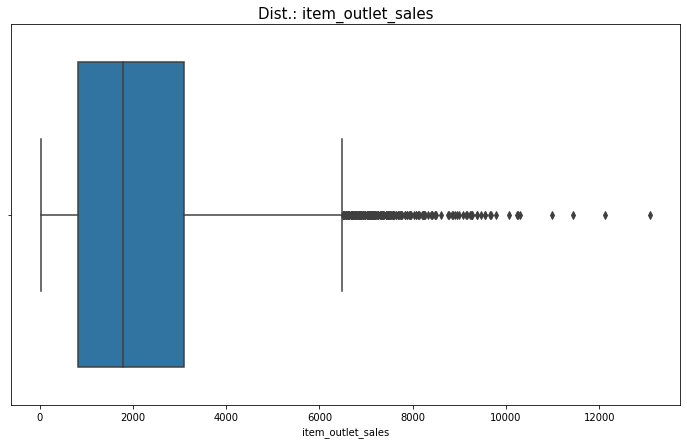

In [23]:
numeric_variables = [col for col in df.columns if df[col].dtypes != 'object']

for v in numeric_variables:
    box(df, v)

## <font color = 'teal'> item_visibility </font>

In [24]:
df.item_visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: item_visibility, dtype: float64

In [25]:
df.groupby('outlet_size').item_visibility.mean()

outlet_size
High      0.060242
Medium    0.059774
Small     0.070872
Name: item_visibility, dtype: float64

In [26]:
df.groupby('outlet_type').item_visibility.mean()

outlet_type
Grocery Store        0.104596
Supermarket Type1    0.060383
Supermarket Type2    0.059976
Supermarket Type3    0.060344
Name: item_visibility, dtype: float64

# <font color =  'gold'> Data Cleaning </font>

In [27]:
# Item_Weight imputing the mean to this variable

missing_numeric = SimpleImputer(missing_values = np.nan, strategy = 'mean')

df_numeric = df.select_dtypes(include = [np.number]).drop(columns = ['item_outlet_sales'])

missing_numeric.fit(df_numeric)
data_numerical = missing_numeric.transform(df_numeric)

data_numerical = pd.DataFrame(data_numerical, columns = df_numeric.columns)
data_numerical['item_outlet_sales'] = df.item_outlet_sales.values # putting back de variable that I tooked out to treat the other ones

In [28]:
# Outlet_Size imputing the mode to this variable

missing_categorical = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

df_categorical = df.select_dtypes(include = 'object')

missing_categorical.fit(df_categorical)
data_categorical = missing_categorical.transform(df_categorical)

data_categorical = pd.DataFrame(data = data_categorical, columns = df_categorical.columns)

In [29]:
order_cols = df.columns
df = pd.concat([data_numerical, data_categorical], axis = 1)

df = df[order_cols]

In [30]:
# treating variable item_fat_content

low_fat = ['Low Fat', 'LF', 'low fat']
regular =  ['Regular', 'reg']

df.item_fat_content.replace(to_replace = low_fat, value = 'low_fat', inplace = True)
df.item_fat_content.replace(to_replace = regular, value = 'regular', inplace = True)

df.item_fat_content.value_counts()

low_fat    9185
regular    5019
Name: item_fat_content, dtype: int64

In [31]:
# treating item_type

df.item_type.replace(to_replace = 'Breads', value = 'Baking Goods', inplace = True)

<AxesSubplot:>

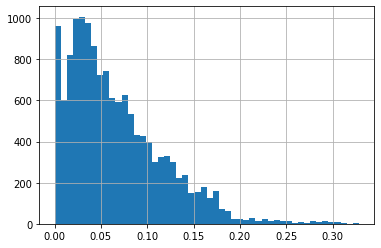

In [32]:
# treating item_visibility

df.item_visibility.hist(bins = 50)

In [33]:
mean_visibility = df.item_visibility.mean()

df.loc[df.item_visibility == 0, 'item_visibility'] = mean_visibility

<AxesSubplot:>

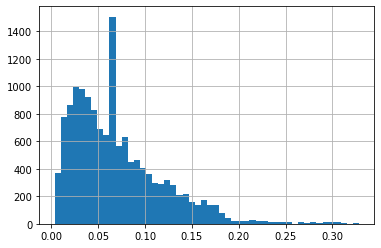

In [34]:
# treating item_visibility

df.item_visibility.hist(bins = 50)

# <font color = 'gold'> Feature Engineering </font>

In [35]:
df['time_operating'] = 2013 - df.outlet_establishment_year

In [36]:
df['item_category_short'] = df.item_identifier.apply(lambda x: x[0:2])
df.item_category_short.value_counts()

FD    10201
NC     2686
DR     1317
Name: item_category_short, dtype: int64

In [37]:
dict_category = {'FD': 'Food and Drinks', 'NC': 'Non-Consumable', 'DR': 'Drinks'}

df['item_category'] = df.item_category_short.map(dict_category)
df.item_category.value_counts()

Food and Drinks    10201
Non-Consumable      2686
Drinks              1317
Name: item_category, dtype: int64

In [38]:
df.loc[df.item_category_short == 'NC', 'item_fat_content'] = 'non-edible'
df.item_fat_content.value_counts()

low_fat       6499
regular       5019
non-edible    2686
Name: item_fat_content, dtype: int64

# <font color = 'gold'> Data Analysis - item_outlet_sales x others

<AxesSubplot:>

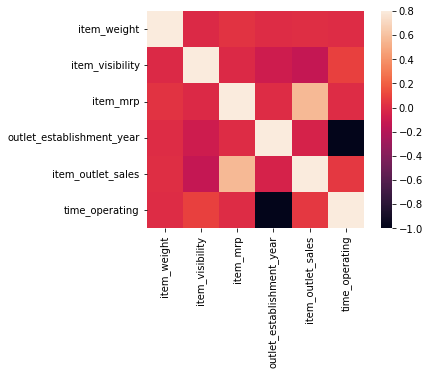

In [39]:
corr_df = df.corr()

sns.heatmap(data = corr_df, vmax=.8,square=True)

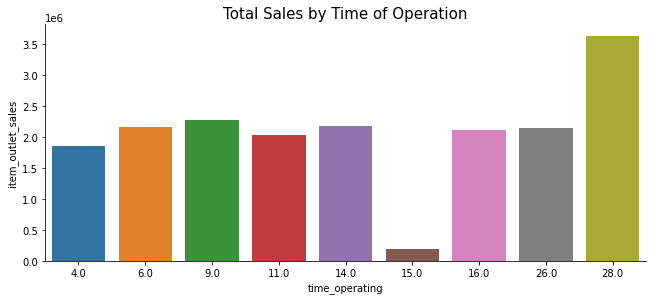

In [40]:
sales_by_time_operating = df.groupby('time_operating').item_outlet_sales.sum().reset_index()
ax = sns.catplot(data = sales_by_time_operating, x = 'time_operating', y = 'item_outlet_sales', kind = 'bar')
ax.figure.set_size_inches(10, 4)
plt.title('Total Sales by Time of Operation', fontsize = 15)
plt.show()

<AxesSubplot:xlabel='item_visibility', ylabel='item_outlet_sales'>

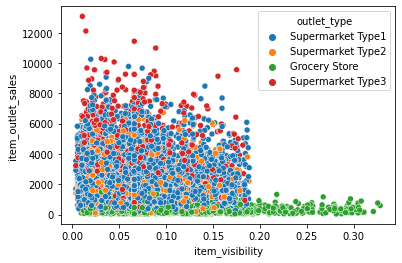

In [41]:
sns.scatterplot(data = df, x = 'item_visibility', y = 'item_outlet_sales', hue = 'outlet_type')

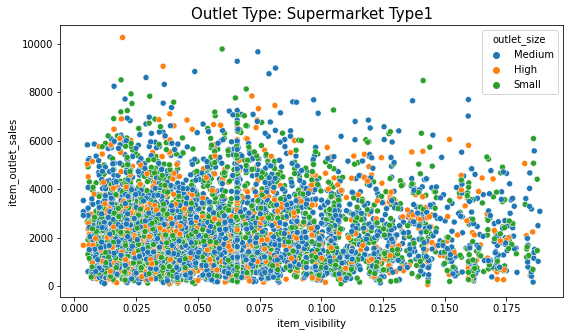

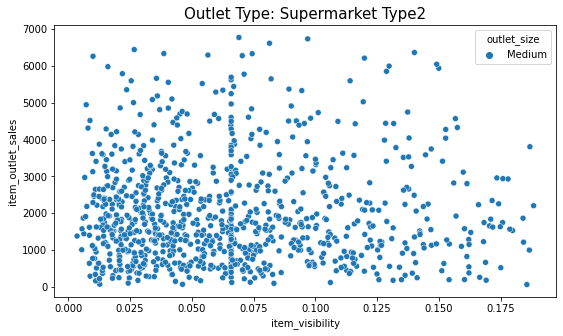

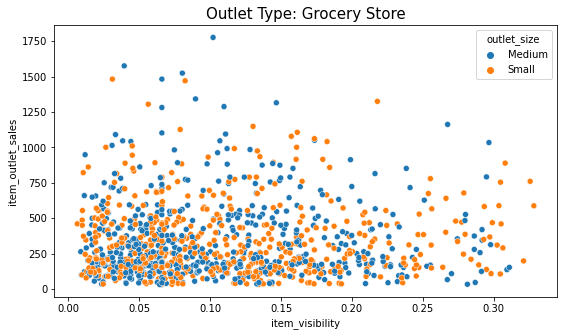

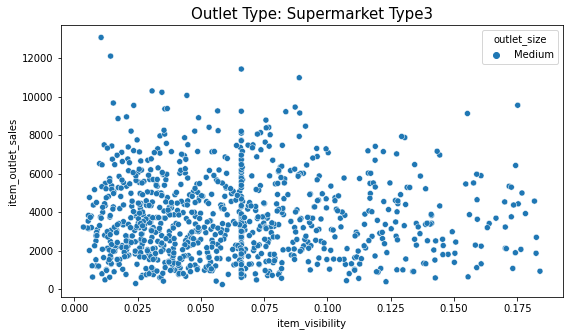

In [42]:
for outlet_type in df.outlet_type.unique():
    _, ax = plt.subplots(figsize = (9, 5))
    sns.scatterplot(data = df.loc[df.outlet_type == outlet_type], 
                    x = 'item_visibility',
                    y = 'item_outlet_sales',
                    hue = 'outlet_size',
                    ax = ax)
    title = 'Outlet Type: ' + outlet_type
    plt.title(title, fontsize = 15)
    plt.show()

In [43]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,source,time_operating,item_category_short,item_category
0,FDA15,9.30,low_fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380,train,14.0,FD,Food and Drinks
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228,train,4.0,DR,Drinks
2,FDN15,17.50,low_fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700,train,14.0,FD,Food and Drinks
3,FDX07,19.20,regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998.0,Medium,Tier 3,Grocery Store,732.3800,train,15.0,FD,Food and Drinks
4,NCD19,8.93,non-edible,0.065953,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052,train,26.0,NC,Non-Consumable


# <font color = 'gold'> Data Preprocessing </font> 

In [44]:
from sklearn.preprocessing import LabelEncoder

le_1 = LabelEncoder()
df['item_fat_content'] = le_1.fit_transform(df['item_fat_content'])

le_2 = LabelEncoder()
df['item_category_short'] = le_2.fit_transform(df['item_category_short'])

le_3 = LabelEncoder()
df['item_type'] = le_3.fit_transform(df['item_type'])

In [45]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,source,time_operating,item_category_short,item_category
0,FDA15,9.30,0,0.016047,3,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380,train,14.0,1,Food and Drinks
1,DRC01,5.92,2,0.019278,13,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228,train,4.0,0,Drinks
2,FDN15,17.50,0,0.016760,9,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700,train,14.0,1,Food and Drinks
3,FDX07,19.20,2,0.065953,5,182.0950,OUT010,1998.0,Medium,Tier 3,Grocery Store,732.3800,train,15.0,1,Food and Drinks
4,NCD19,8.93,1,0.065953,8,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052,train,26.0,2,Non-Consumable


In [46]:
df.outlet_type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [47]:
# OUTLET SIZE
outlet_size_labels = {'Small': 1,
                      'Medium': 2,
                      'High': 3}
df['outlet_size'] = df.outlet_size.map(outlet_size_labels)

# OUTLET LOCATION TYPE
outlet_location_type_labels = {'Tier 1': 3,
                               'Tier 2': 2,
                               'Tier 3': 1}

df['outlet_location_type'] = df.outlet_location_type.map(outlet_location_type_labels)

# OUTLET TYPE
outlet_type_labels = {'Grocery Store': 1,
                      'Supermarket Type1': 2,
                      'Supermarket Type2': 3,
                      'Supermarket Type3': 4}

df['outlet_type'] = df.outlet_type.map(outlet_type_labels)

In [58]:
drop_cols = ['source', 'item_identifier', 'item_category', 'outlet_identifier']
test_clean = df.loc[df.source == 'test'].drop(columns = drop_cols)
train_clean = df.loc[df.source == 'train'].drop(columns = drop_cols)

In [59]:
test_clean.to_csv(path_or_buf = 'test_clean.csv', index = False)
train_clean.to_csv(path_or_buf = 'train_clean.csv', index = False)

In [57]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,source,time_operating,item_category_short,item_category
0,FDA15,9.30,0,0.016047,3,249.8092,OUT049,1999.0,2,3,2,3735.1380,train,14.0,1,Food and Drinks
1,DRC01,5.92,2,0.019278,13,48.2692,OUT018,2009.0,2,1,3,443.4228,train,4.0,0,Drinks
2,FDN15,17.50,0,0.016760,9,141.6180,OUT049,1999.0,2,3,2,2097.2700,train,14.0,1,Food and Drinks
3,FDX07,19.20,2,0.065953,5,182.0950,OUT010,1998.0,2,1,1,732.3800,train,15.0,1,Food and Drinks
4,NCD19,8.93,1,0.065953,8,53.8614,OUT013,1987.0,3,1,2,994.7052,train,26.0,2,Non-Consumable


In [60]:
train_clean

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,time_operating,item_category_short
0,9.300,0,0.016047,3,249.8092,1999.0,2,3,2,3735.1380,14.0,1
1,5.920,2,0.019278,13,48.2692,2009.0,2,1,3,443.4228,4.0,0
2,17.500,0,0.016760,9,141.6180,1999.0,2,3,2,2097.2700,14.0,1
3,19.200,2,0.065953,5,182.0950,1998.0,2,1,1,732.3800,15.0,1
4,8.930,1,0.065953,8,53.8614,1987.0,3,1,2,994.7052,26.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,12,214.5218,1987.0,3,1,2,2778.3834,26.0,1
8519,8.380,2,0.046982,0,108.1570,2002.0,2,2,2,549.2850,11.0,1
8520,10.600,1,0.035186,7,85.1224,2004.0,1,2,2,1193.1136,9.0,2
8521,7.210,2,0.145221,12,103.1332,2009.0,2,1,3,1845.5976,4.0,1
